__RESTAURANT SALES DATA ANALYSIS__
> We will be exploring a sales data of an restaurant, we will try to find insight that could help the stakeholders of the restaurant understand their business more. We will clean and prepare the data first then we will explore the data. after we perform the EDA, we will create a simple dashboard of this dataset

__Data Preparation and Cleaning__ 
> Here we will be preparing our data for an Exploratory Data Analysis, we will setup the tools, then we will check our data set for any null values, inconsistent data, wrong data types, etc. and deal with them.

In [43]:
#importing tools to setup our data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [44]:
#importing our CSV file into pandas

file = "restaurant_data.csv"

df = pd.read_csv(file)

In [45]:
#Little display at the top of our data to check the columns and data of each column

df.head()

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
0,10/1/2023,tarri poha,20,52,5,57,1140
1,10/1/2023,samosa,12,10,12,22,264
2,10/1/2023,samosa,12,23,0,23,276
3,10/1/2023,bread pakoda,20,29,24,53,1060
4,10/1/2023,bread pakoda,20,25,0,25,500


In [46]:
#Quick info check shows us the data type of each column and their counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             649 non-null    object
 1   Dish Name        649 non-null    object
 2   Price            649 non-null    int64 
 3   Dine In          649 non-null    int64 
 4   Parcel           649 non-null    int64 
 5   Total Customers  649 non-null    int64 
 6   Total Sales      649 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 35.6+ KB


In [47]:
#Display our columns in a list, to check if our header needs cleaning

df.columns

Index(['Date', 'Dish Name', 'Price', 'Dine In', 'Parcel', 'Total Customers',
       'Total Sales'],
      dtype='object')

In [48]:
#Desciptive Statistics of numerical columns of the dataset

df.describe()

,Price,Dine In,Parcel,Total Customers,Total Sales
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,20.363636,27.915254,8.365177,36.280431,757.796610
std,5.452684,15.290517,9.223766,15.075272,417.017092
min,12.000000,7.000000,0.000000,7.000000,84.000000
25%,20.000000,17.000000,0.000000,25.000000,440.000000
50%,20.000000,25.000000,6.000000,34.000000,680.000000
75%,20.000000,33.000000,14.000000,46.000000,980.000000
max,30.000000,75.000000,30.000000,80.000000,2250.000000


In [49]:
#Checking the list of unique category in our Dish Name column.

df["Dish Name"].unique()

array(['tarri poha', 'samosa', 'bread pakoda', 'aloo paratha', 'idli',
       'boiled eggs'], dtype=object)

In [50]:
#Parsing our Date column to date datatype.

df["Date"] = pd.to_datetime(df["Date"])

df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
649 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.2 KB


In [51]:
#Checking for the changes we've done in the dataset
df.head()

,Date,Dish Name,Price,Dine In,Parcel,Total Customers,Total Sales
0,2023-10-01,tarri poha,20,52,5,57,1140
1,2023-10-01,samosa,12,10,12,22,264
2,2023-10-01,samosa,12,23,0,23,276
3,2023-10-01,bread pakoda,20,29,24,53,1060
4,2023-10-01,bread pakoda,20,25,0,25,500


In [52]:
#Checking the shape of the dataset, the number of rows and columns, respectively

df.shape

(649, 7)

__Exploratory Data Analysis__

> Let's take a look at our data and find some insights from it using data
visualizations. Exploratory Data Analysis can answer our question, identify pattern and see the relationship of the data

Sales 

(array([19631., 19638., 19645., 19652., 19662., 19669., 19676., 19683.]),
 [Text(19631.0, 0, '2023-10-01'),
  Text(19638.0, 0, '2023-10-08'),
  Text(19645.0, 0, '2023-10-15'),
  Text(19652.0, 0, '2023-10-22'),
  Text(19662.0, 0, '2023-11-01'),
  Text(19669.0, 0, '2023-11-08'),
  Text(19676.0, 0, '2023-11-15'),
  Text(19683.0, 0, '2023-11-22')])

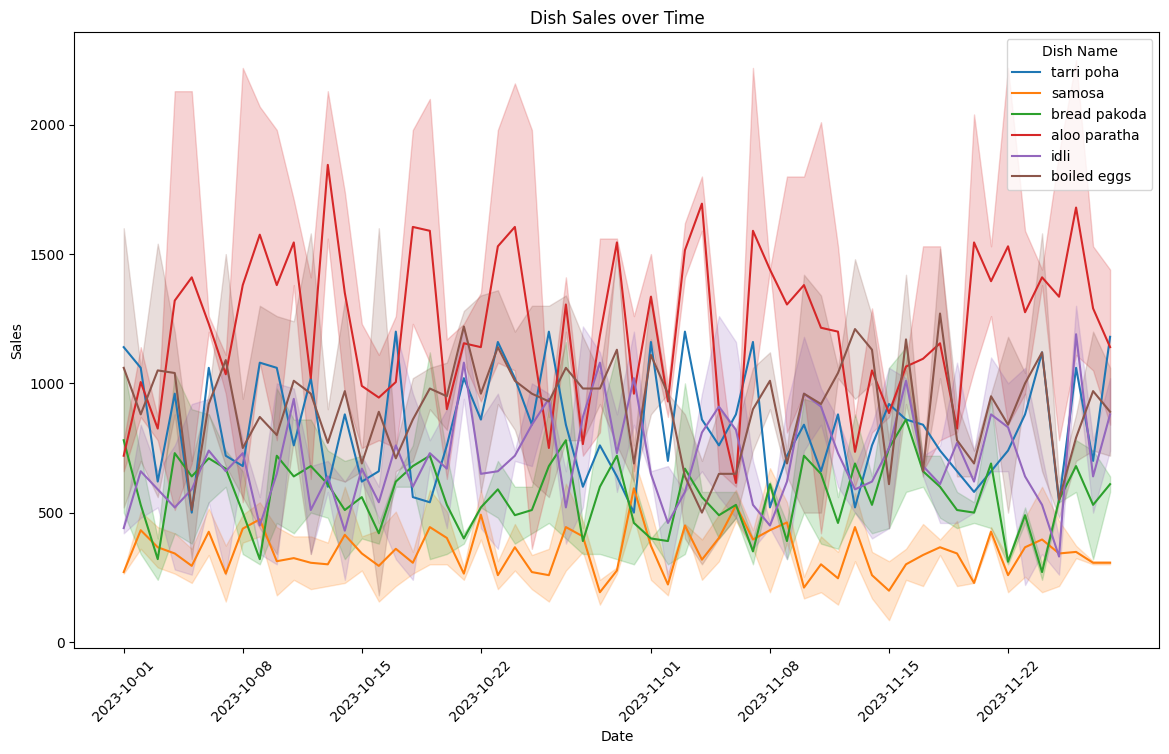

In [53]:
#Plotting a Timeline chart to see the movement of sales of dishes over the course of time

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x="Date", y="Total Sales", hue="Dish Name")
plt.title("Dish Sales over Time")
plt.ylabel("Sales")
plt.xticks(rotation=45)

> From the visual above we can already infer that our best selling dish is Aloo Paratha and it's maintained it's position at the top. Our lowest contributor to sales is Samosa

In [54]:
#Prepared a list of Sale Average each day to plot  

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df_by_day = df.groupby(df['Date'].dt.day_of_week, as_index=False)["Total Sales"].mean()
df_by_day

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9768\1771493225.py:4: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  df_by_day = df.groupby(df['Date'].dt.day_of_week, as_index=False)["Total Sales"].mean()


,Total Sales
0,740.101010
1,767.353535
2,777.545455
3,744.477273
4,786.909091
5,748.204545
6,742.868687


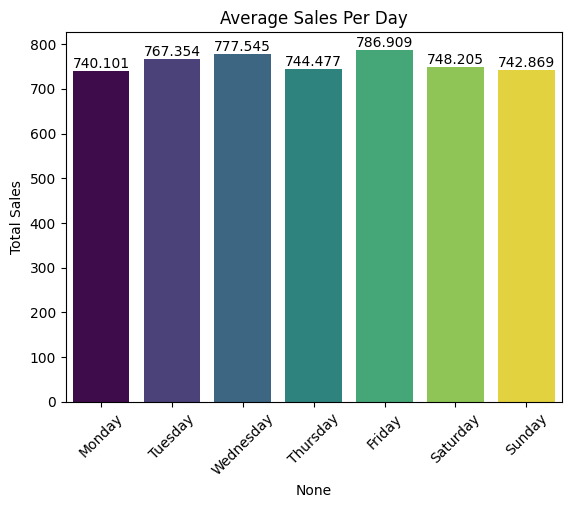

In [55]:
#Plot the average sales per day
bar = sns.barplot(data=df_by_day, x=df_by_day.index, y="Total Sales", hue=df_by_day.index, palette="viridis")
bar.set_xticks(df_by_day.index)
bar.set_xticklabels(days, rotation=45)
plt.title("Average Sales Per Day")
bar.legend().remove()

for i in bar.containers:
    bar.bar_label(i,)


> We can see that we get the best average sales on Tuesday and Wednesdays and our lowest on Thursdays, from this insight, the best day to implement promos are on our lowest day sales, which is Thursday

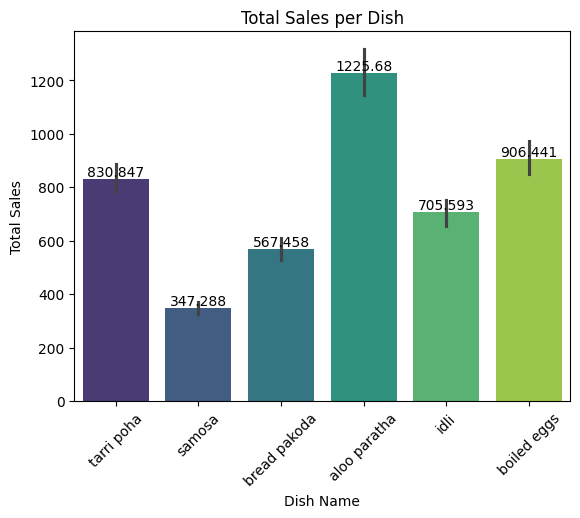

In [56]:
#Plot the total sales per dish
bar = sns.barplot(data=df, x="Dish Name", y="Total Sales", hue="Dish Name", palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Sales per Dish")
for i in bar.containers:
    bar.bar_label(i,)
plt.show()

>From the bar chart above, **Aloo Paratha** and **Boiled Eggs** were our best selling dishes for the time period, with samosa as the lowest. This insight shows us what dishes should we focus on or dishes we should improve upon.

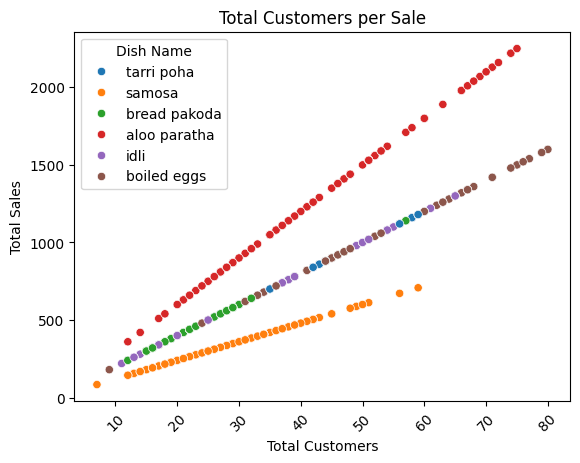

In [57]:
#Check the relationship of Total Customer (Transaction Count) with the Total Sales
sns.scatterplot(data=df, x="Total Customers", y="Total Sales", hue="Dish Name")
plt.xticks(rotation=45)
plt.title("Total Customers per Sale")
plt.show()


We could see above that higher customer number yields us higher sales, though this is obvious, what we might not know is what dishes actual gives us better sales over customer count. Aloo is the best dish as it has the highest SRP so we get more dollar per sale, while samosa has the lowest dollar per sale. With this info we should focus on selling aloo paratha more if possible

In [58]:
#Get the Dine-in and Takeout(Parcel) sales of each dishes
df["Dine In Sales"] = df["Price"] * df["Dine In"]
df["Takeout Sales"] = df["Price"] * df["Parcel"]
df_by_channel = df.melt(id_vars=["Dish Name"], value_vars=["Dine In Sales", "Takeout Sales"], var_name="Sales", value_name="Amount")
df_by_channel.groupby(["Dish Name", "Sales"]).sum()

Amount
Dish Name    Sales                
aloo paratha Dine In Sales  114300
             Takeout Sales   30330
boiled eggs  Dine In Sales   78260
             Takeout Sales   28700
bread pakoda Dine In Sales   49000
             Takeout Sales   17960
idli         Dine In Sales   66180
             Takeout Sales   17080
samosa       Dine In Sales   31464
             Takeout Sales    9516
tarri poha   Dine In Sales   40260
             Takeout Sales    8760

Text(0.5, 1.0, 'Dine In and Take out Sales')

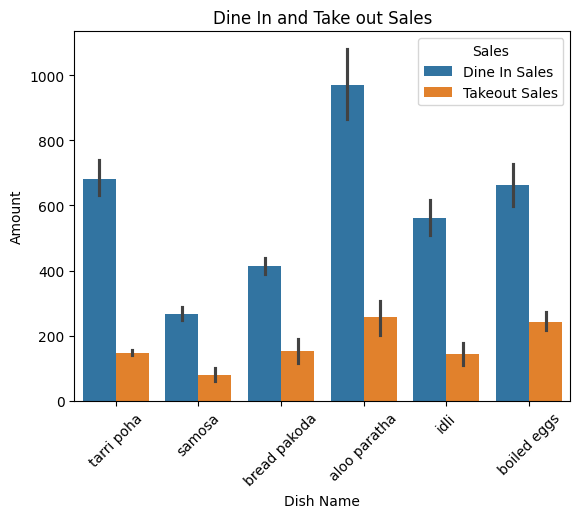

In [59]:
#Plot the Sales per Channel per dishes
sns.barplot(data=df_by_channel, x="Dish Name", y="Amount", hue="Sales")
plt.xticks(rotation=45)
plt.title("Dine In and Take out Sales")

We see here that Dine Sales are overall higher than the Takeout sales, meaning dine-ins are our best sales channel. This also means that our customers prefer to dine to our restaurant than to take-out. This means we should focus more on our dine-in values as dine-in is our strength. We could use this info, for example, if we were to open another store, we know that we should focus on the dine-in experience instead of the take-out effieciency.

Text(0.5, 0, 'Dine In Count')

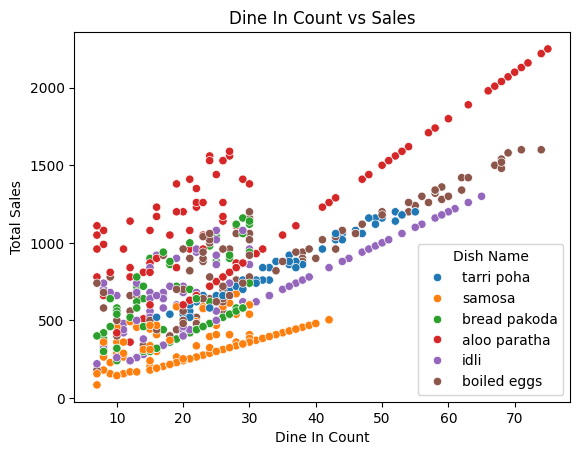

In [60]:
#Plot the relationship of Dine-in count to Total Sales
sns.scatterplot(data=df, x="Dine In", y="Total Sales", hue="Dish Name")
plt.title("Dine In Count vs Sales")
plt.xlabel("Dine In Count")

This shows that higher dine-in count gives us more sales

Text(0.5, 0, 'Takeout Count')

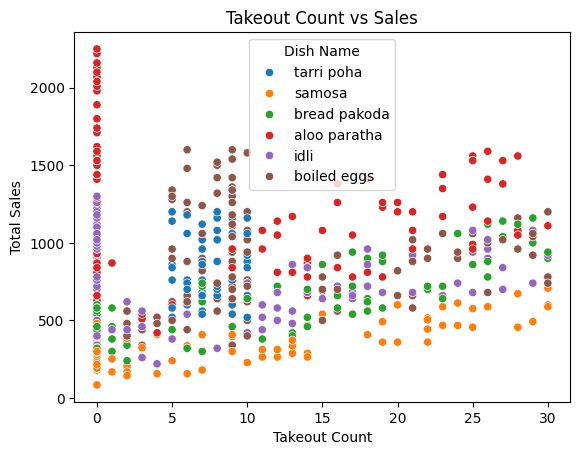

In [61]:
#Plot the relation ship of Takeout to Total Sales
sns.scatterplot(data=df, x="Parcel", y="Total Sales", hue="Dish Name")
plt.title("Takeout Count vs Sales")
plt.xlabel("Takeout Count")

If we compare this to the Dine-in Count vs Sales analysis, we see that the takeout count does not necessarily show a direct proportional relationship with Total Sales. We could see that the highest sales are usually at the 0 Takeout area.

In [62]:
#Get the transaction count per dishes per channel
df_qty_by_channel= df.melt(id_vars=["Dish Name"], value_vars=["Dine In", "Parcel"], var_name="Sales", value_name="Amount")
df_qty_by_channel.groupby(["Dish Name", "Sales"]).sum()

Amount
Dish Name    Sales          
aloo paratha Dine In    3810
             Parcel     1011
boiled eggs  Dine In    3913
             Parcel     1435
bread pakoda Dine In    2450
             Parcel      898
idli         Dine In    3309
             Parcel      854
samosa       Dine In    2622
             Parcel      793
tarri poha   Dine In    2013
             Parcel      438

Text(0, 0.5, 'Transaction Count')

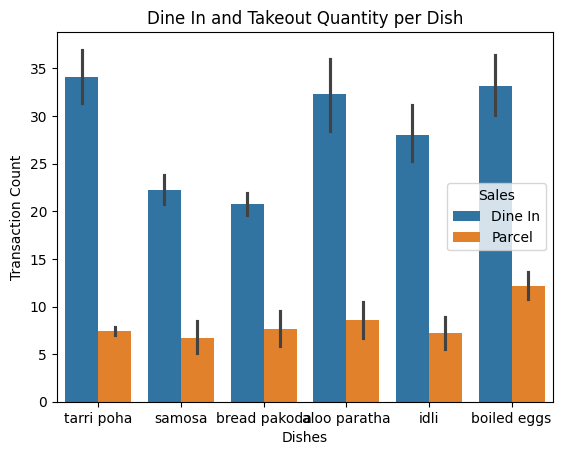

In [63]:
#Plot the transaction count per dish per channel
sns.barplot(data=df_qty_by_channel, x="Dish Name", y="Amount", hue="Sales")
plt.title("Dine In and Takeout Quantity per Dish")
plt.xlabel("Dishes")
plt.ylabel("Transaction Count")

Dine-in count is overall higher than takeouts, with __tarri poha__, __aloo paratha__ and __boiled eggs__ as the most prefered Dine-in order and __boiled eggs__, __aloo paratha__ and __bread pakoda__ as the highest takeout orders.

In [64]:
# Get the total Channel Sales per day
df_sale_line_plot = df.melt(id_vars=["Date"], value_vars=["Dine In Sales", "Takeout Sales",], var_name="Sales", value_name="Amount")
df_sale_line_plot


,Date,Sales,Amount
0,2023-10-01,Dine In Sales,1040
1,2023-10-01,Dine In Sales,120
2,2023-10-01,Dine In Sales,276
3,2023-10-01,Dine In Sales,580
4,2023-10-01,Dine In Sales,500
...,...,...,...
1293,2023-11-28,Takeout Sales,0
1294,2023-11-28,Takeout Sales,200
1295,2023-11-28,Takeout Sales,0
1296,2023-11-28,Takeout Sales,580


Text(0.5, 1.0, 'Dine In and Takeout Sales over Time')

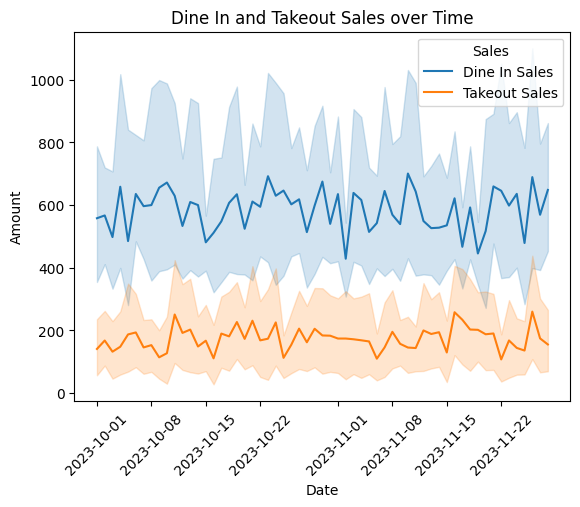

In [65]:
#Create a time-series plot of dine-in and takeout sales
sns.lineplot(data=df_sale_line_plot, x="Date", y="Amount", hue="Sales")
plt.xticks(rotation=45)
plt.title("Dine In and Takeout Sales over Time")


We see that there's no particular trend in our sales data, though what we could is that the Dine-in Sales are significantly higher than their Takeout Sales counterpart.

In [66]:
#create a cleaned version of our dataset
df.to_csv("resto_sales_cleaned.csv")